In [2]:
%matplotlib inline

# C60 XANES Simulations

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read
from ase.visualize import view

## Isolated C60 Molecule

### Structure

In [5]:
# Location of espresso input file:
c60_scf = './01_isolated/c60_scf.pwi'

# Read input to ase atoms object
c60 = read(c60_scf)

In [8]:
# Display c60 molecule to check structure
view(c60, viewer='ngl')

### Plotting the xanes spectrum (dipole approximation + core hole)

In [42]:
# Location of xanes simulation:
xanesDat = './01_isolated/xanes.dat'

# Location of reference data
# https://doi.org/10.1039/C5CP07783D (Figure 1, C60 Reference)
refDat = './reference/referenceData.dat'

# Read in data
c60Xanes = np.loadtxt(xanesDat)
c60Refer = np.loadtxt(refDat)

# For quick evaluation I normalise the egde(s) to 1
c60Xanes[:,1] = c60Xanes[:,1]/0.09381331
c60Refer[:,1] = (c60Refer[:,1]-0.15660257131076882)/(1.4560890588103002-0.15660257131076882)

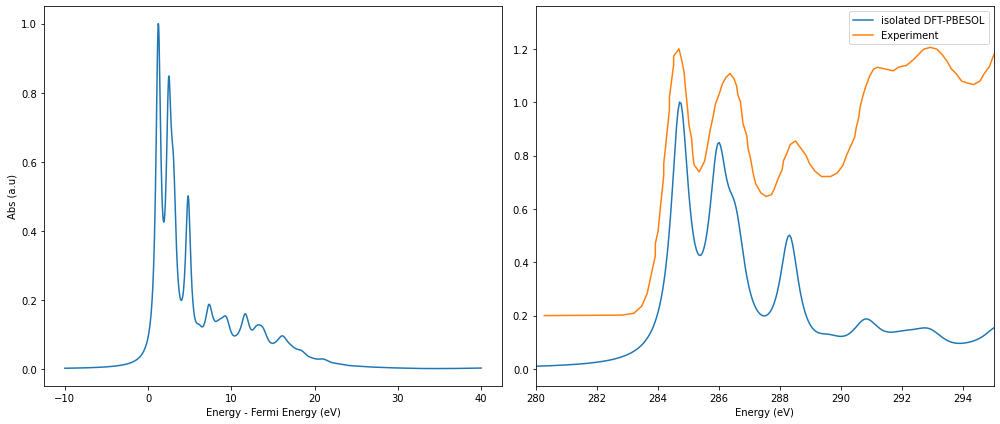

In [46]:
# Set up plot
fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,6)

ax[1].set_xlim([280,295])

ax[0].set_ylabel('Abs (a.u)')
ax[0].set_xlabel('Energy - Fermi Energy (eV)')
ax[1].set_xlabel('Energy (eV)')

ax[0].plot(c60Xanes[:,0], c60Xanes[:,1])
ax[1].plot(c60Xanes[:,0]+283.5, c60Xanes[:,1], label='isolated DFT-PBESOL') # Shifted to align the edges
ax[1].plot(c60Refer[:,0], 0.2 + c60Refer[:,1], label='Experiment')

ax[1].legend()
fig.tight_layout()